In [1]:
import numpy as np

# HOMEWORK

1. Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [2]:
A_1 = np.random.random((10, 3))

[A_1[k, np.abs(A_1[k, :] - 0.5).argmin()] for k in range(10)]

[0.517688560685117,
 0.591849093825266,
 0.4981342812366002,
 0.41231870278577887,
 0.6749180209475999,
 0.8113795598699397,
 0.36345059156660486,
 0.26626962412776023,
 0.19934679262155441,
 0.6382837374541305]

2. Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [3]:
A_2 = np.random.random((6, 6))

[A_2[k, :].sum() / A_2[:, k].max() for k in range(6)]

[4.613911343880174,
 2.756929922813561,
 4.495633040261385,
 3.145023611199689,
 1.400052039778635,
 2.846898653986584]

3. На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [4]:
X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

zero = (X == 0)
X[1:][zero[:-1]].max()

5

4. Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [5]:
X = np.ones(10)
I = np.array([0, 1, 2, 3, 5, 5, 5, 8])

for i in I: X[i] += 1
    
X

array([2., 2., 2., 2., 1., 4., 1., 1., 2., 1.])

5. Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать не более двух циклов while (for).

K-means algorithm:

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np



def compute_sse(data, centroids, assigned_centroids):
    return np.sqrt(((data - centroids[assigned_centroids]) ** 2).sum(axis = 0)).sum() / len(data)

def assigned_centroids(points, centroids):
    return np.argmin(np.sqrt(((points - centroids[:, np.newaxis]) ** 2).sum(axis = 2)), axis = 0)

def move_centroids(points, assigned_centroids, centroids):
    return np.array([points[assigned_centroids == k].mean(axis = 0) for k in range(centroids.shape[0])])

def _kmeans(data, centroids, thresh):
    sse_0 = compute_sse(data, centroids, assigned_centroids(data, centroids))
    diff = thresh + 1
   
    while diff > thresh:
        diff = compute_sse(data, move_centroids(data, assigned_centroids(data, centroids), centroids), assigned_centroids(data, move_centroids(data, assigned_centroids(data, centroids), centroids))) - sse_0
        sse_0 = compute_sse(data, move_centroids(data, assigned_centroids(data, centroids), centroids), assigned_centroids(data, move_centroids(data, assigned_centroids(data, centroids), centroids)))
            
    return assigned_centroids(data, move_centroids(data, assigned_centroids(data, centroids), centroids)), compute_sse(data, move_centroids(data, assigned_centroids(data, centroids), centroids), assigned_centroids(data, move_centroids(data, assigned_centroids(data, centroids), centroids)))



def k_means(data, k_or_guess, iter = 20, thresh = 1e-5):
    
    if int(iter) < 1:
        raise ValueError("iter must be at least 1.")
        
    if type(k_or_guess) == type(np.array([])):
        guess = k_or_guess
        if guess.size < 1:
            raise ValueError("Asked for 0 cluster ? initial book was %s" %
                             guess)
            
        result = _kmeans(data, guess, thresh=thresh)
    else:
        best_sse = np.inf
        k = k_or_guess
        if k < 1:
            raise ValueError("Asked for 0 cluster?")
            
        for i in range(iter):
            No = data.shape[0]
            guess = np.take(data, np.random.randint(0, No, k), 0)
            code, sse = _kmeans(data, guess, thresh=thresh)
            if sse < best_sse:
                best_code = code
                best_sse = sse
                
        result = best_code, best_sse
        
    return result

Elbow method:

In [7]:
def elbow_method(data, K):
    
    plt.plot(range(1, K), [k_means(data, k)[1] for k in range(1, K)])
    plt.title("The Elbow Method")
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortion")
    plt.show()

6. С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возраст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

In [8]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)

data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)

Preprocessing of data:

In [9]:
Age = data[:, 2]
Income = data[:, 3]
Spending_Score = data[:, 4]

Age = Age[:, np.newaxis]
Income = Income[:, np.newaxis]
Spending_Score = Spending_Score[:, np.newaxis]

AI = np.concatenate((Age, Income), axis = 1)
AS = np.concatenate((Age, Spending_Score), axis = 1)
IS = np.concatenate((Income, Spending_Score), axis = 1)

Visualization:

In [10]:
def visualization(data, N):
    plt.scatter(data[:, 0], data[:, 1], c = k_means(data, N)[0], s = 50, cmap = 'viridis')

<ipython-input-6-9a8981dd1fc0>:14: RuntimeWarning: Mean of empty slice.
  return np.array([points[assigned_centroids == k].mean(axis = 0) for k in range(centroids.shape[0])])


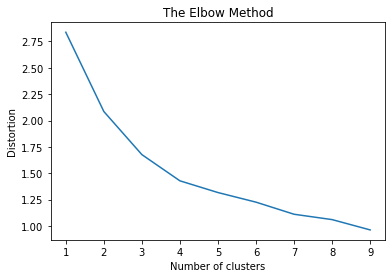

In [17]:
elbow_method(AI, 10)

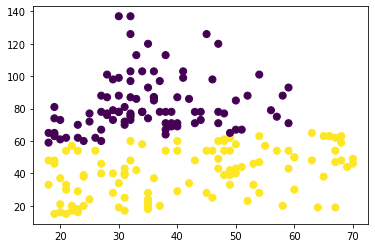

In [18]:
visualization(AI, 2)

Ordinary interpretation: For each age group there is a division into high-income and low-income part of humans. 

<ipython-input-6-9a8981dd1fc0>:14: RuntimeWarning: Mean of empty slice.
  return np.array([points[assigned_centroids == k].mean(axis = 0) for k in range(centroids.shape[0])])


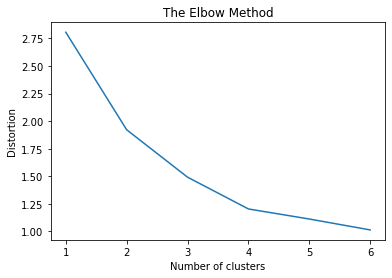

In [28]:
elbow_method(AS, 7)

<ipython-input-6-9a8981dd1fc0>:14: RuntimeWarning: Mean of empty slice.
  return np.array([points[assigned_centroids == k].mean(axis = 0) for k in range(centroids.shape[0])])


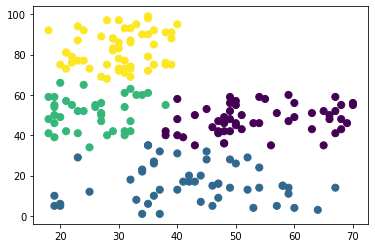

In [29]:
visualization(AS, 4)

Ordinary interpretation: One can notice that low-spending score people have different age, and humans under 40 years divide into three spending-score group. 

<ipython-input-6-9a8981dd1fc0>:14: RuntimeWarning: Mean of empty slice.
  return np.array([points[assigned_centroids == k].mean(axis = 0) for k in range(centroids.shape[0])])


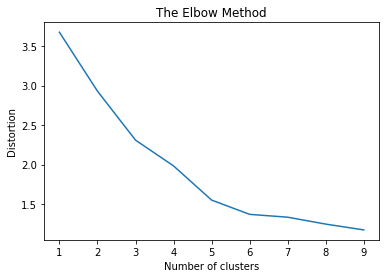

In [30]:
elbow_method(IS, 10)

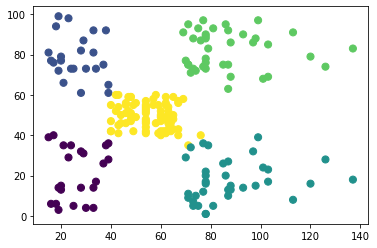

In [23]:
visualization(IS, 5)

Ordinary interpretation: Group of people that has a 40-60 k$ income has very bounded spending-score.